In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [50]:
df_pre = pd.read_csv(Path(r'AnomaliesRecycling/presorted.csv'))
df_clu = pd.read_csv(Path(r'AnomaliesRecycling/cluttered.csv'))

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

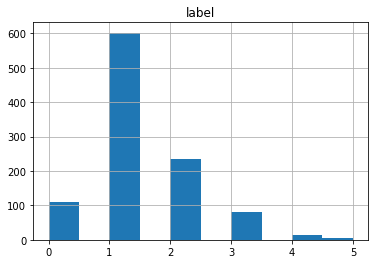

In [51]:
df_clu.hist(column='label')

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

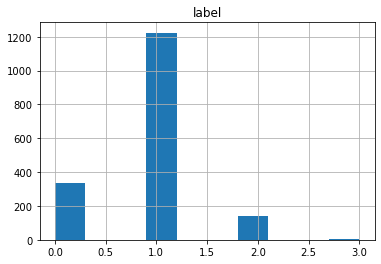

In [52]:
df_pre.hist(column='label')

In [53]:
df_clu.head()

,Unnamed: 0,name,label,issue,edge
0,0,Anlerndaten (1).jpg,1.0,0.0,0.0
1,1,Anlerndaten (10).jpg,1.0,0.0,0.0
2,2,Anlerndaten (100).jpg,1.0,1.0,0.0
3,3,Anlerndaten (1000).jpg,1.0,0.0,0.0
4,4,Anlerndaten (1001).jpg,1.0,0.0,0.0


In [54]:
df_clu['name'] = df_clu.name.apply(lambda name: "/cluttered/" + name)
df_pre['name'] = df_pre.name.apply(lambda name: "/presorted/" + name)

In [55]:
df = pd.concat([df_clu, df_pre], axis=0)
df = df.astype({"label":"int","issue":"int", "edge": "int"})
X = df.drop(columns=['label'])

y = df['label']
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

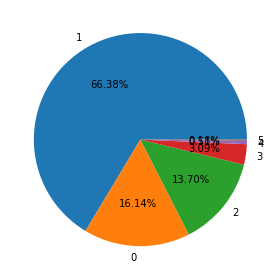

In [56]:
plt.pie(y.value_counts(),labels=y.unique(),autopct = '%1.2f%%')
plt.tight_layout()

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in splitter.split(X,y):     #this will splits the index
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]


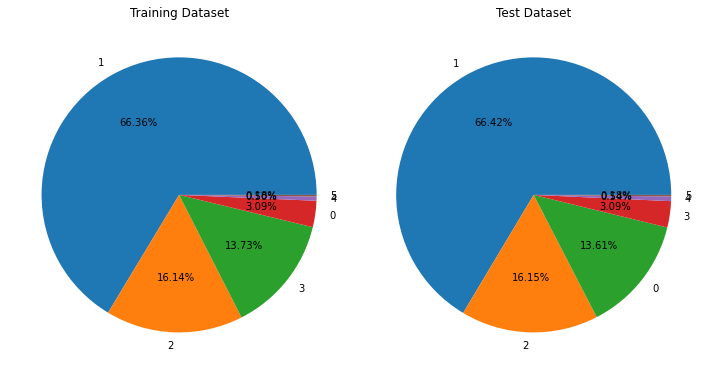

In [58]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.pie(y_train_SS.value_counts(),labels=y_train_SS.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot(122)
plt.pie(y_test_SS.value_counts(),labels=y_test_SS.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()


In [59]:
df_train = pd.concat([X_train_SS, y_train_SS], axis=1)
df_test = pd.concat([X_test_SS, y_test_SS], axis=1)

In [60]:
df_train.to_csv(Path(r'AnomaliesRecycling/train.csv'))
df_test.to_csv(Path(r'AnomaliesRecycling/test.csv'))

In [ ]:
print("END")